#####Project Code

Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
%matplotlib inline

Loading the dataset 

In [ ]:
#Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

Creating a function that will return correlation matrix for any dataframe

In [ ]:
def create_correlation_matrix(dataframe):
    data = pd.get_dummies(dataframe)
    cormat = data.corr()
    return round(cormat, 2)

Creating a function that will create count plot for given input

In [ ]:
def plot_feature_churn(df,x):
    features = x

    fig, axes = plt.subplots(2,3, figsize=(12, 7))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.countplot(data=df, x=feature, hue='Churn', ax=axes[i])

##Exploring Variables with Binary Features

Lets look the sampling of each variables with respect to churn...

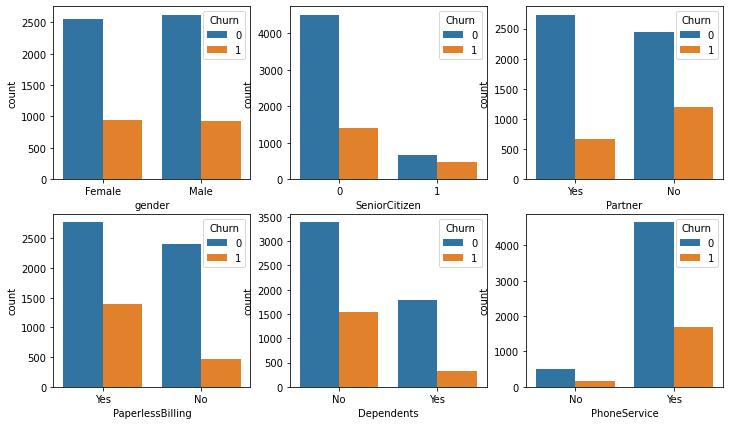

In [ ]:
binary_features=['gender', 'SeniorCitizen', 'Partner', 'PaperlessBilling' , 'Dependents','PhoneService']
binary_data=df[['Churn','gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']]
plot_feature_churn(df,binary_features)

Correlation of each binary variables with respect to churn...

In [ ]:
create_correlation_matrix(binary_data)

,Churn,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
Churn,1.00,0.15,0.01,-0.01,0.15,-0.15,0.16,-0.16,-0.01,0.01,-0.19,0.19
SeniorCitizen,0.15,1.00,0.00,-0.00,-0.02,0.02,0.21,-0.21,-0.01,0.01,-0.16,0.16
gender_Female,0.01,0.00,1.00,-1.00,-0.00,0.00,0.01,-0.01,-0.01,0.01,-0.01,0.01
gender_Male,-0.01,-0.00,-1.00,1.00,0.00,-0.00,-0.01,0.01,0.01,-0.01,0.01,-0.01
Partner_No,0.15,-0.02,-0.00,0.00,1.00,-1.00,0.45,-0.45,0.02,-0.02,-0.01,0.01
Partner_Yes,-0.15,0.02,0.00,-0.00,-1.00,1.00,-0.45,0.45,-0.02,0.02,0.01,-0.01
Dependents_No,0.16,0.21,0.01,-0.01,0.45,-0.45,1.00,-1.00,-0.00,0.00,-0.11,0.11
Dependents_Yes,-0.16,-0.21,-0.01,0.01,-0.45,0.45,-1.00,1.00,0.00,-0.00,0.11,-0.11
PhoneService_No,-0.01,-0.01,-0.01,0.01,0.02,-0.02,-0.00,0.00,1.00,-1.00,0.02,-0.02
PhoneService_Yes,0.01,0.01,0.01,-0.01,-0.02,0.02,0.00,-0.00,-1.00,1.00,-0.02,0.02


##Exploring Variables with Multiple Features

Lets look the sampling of each variables with respect to churn...

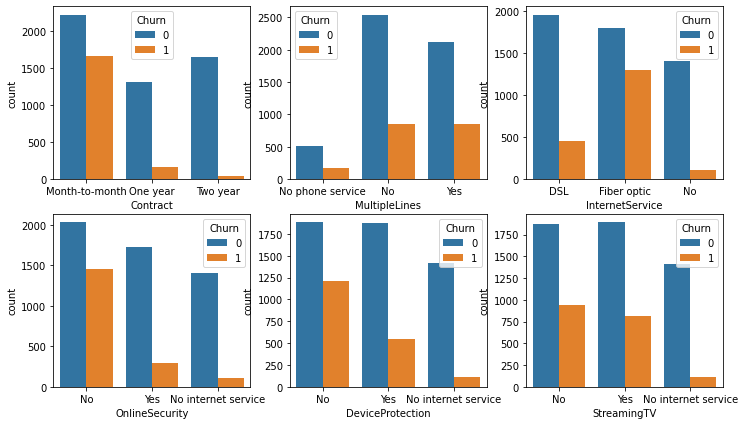

In [ ]:
multiple_features=['Contract','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','StreamingTV']
multiple_data=df[['Churn','Contract','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','StreamingTV']]
plot_feature_churn(df,multiple_features)

In [ ]:
create_correlation_matrix(multiple_data)

,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
Churn,1.00,0.41,-0.18,-0.30,-0.03,-0.01,0.04,-0.12,0.31,-0.23,0.34,-0.23,-0.17,0.25,-0.23,-0.07,0.13,-0.23,0.06
Contract_Month-to-month,0.41,1.00,-0.57,-0.62,0.09,0.00,-0.09,-0.07,0.24,-0.22,0.40,-0.22,-0.25,0.40,-0.22,-0.23,0.30,-0.22,-0.11
Contract_One year,-0.18,-0.57,1.00,-0.29,0.00,0.00,-0.00,0.05,-0.08,0.04,-0.12,0.04,0.10,-0.13,0.04,0.10,-0.09,0.04,0.06
Contract_Two year,-0.30,-0.62,-0.29,1.00,-0.10,-0.00,0.11,0.03,-0.21,0.22,-0.35,0.22,0.19,-0.34,0.22,0.17,-0.26,0.22,0.07
MultipleLines_No,-0.03,0.09,0.00,-0.10,1.00,-0.32,-0.82,-0.07,-0.19,0.31,-0.12,0.31,-0.15,-0.03,0.31,-0.24,0.00,0.31,-0.27
MultipleLines_No phone service,-0.01,0.00,0.00,-0.00,-0.32,1.00,-0.28,0.45,-0.29,-0.17,0.06,-0.17,0.09,0.07,-0.17,0.07,0.12,-0.17,0.02
MultipleLines_Yes,0.04,-0.09,-0.00,0.11,-0.82,-0.28,1.00,-0.20,0.37,-0.21,0.08,-0.21,0.10,-0.02,-0.21,0.20,-0.08,-0.21,0.26
InternetService_DSL,-0.12,-0.07,0.05,0.03,-0.07,0.45,-0.20,1.00,-0.64,-0.38,0.02,-0.38,0.32,0.18,-0.38,0.15,0.30,-0.38,0.02
InternetService_Fiber optic,0.31,0.24,-0.08,-0.21,-0.19,-0.29,0.37,-0.64,1.00,-0.47,0.41,-0.47,-0.03,0.22,-0.47,0.18,0.06,-0.47,0.33
InternetService_No,-0.23,-0.22,0.04,0.22,0.31,-0.17,-0.21,-0.38,-0.47,1.00,-0.52,1.00,-0.33,-0.47,1.00,-0.38,-0.43,1.00,-0.42


##Exploring Numerical Features

In [ ]:
numeric_data = df[['Churn','tenure','TotalCharges','MonthlyCharges']]

In [ ]:
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'], errors='coerce')
create_correlation_matrix(numeric_data)

<ipython-input-13-ede277cf4a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'], errors='coerce')


,Churn,tenure,TotalCharges,MonthlyCharges
Churn,1.00,-0.35,-0.20,0.19
tenure,-0.35,1.00,0.83,0.25
TotalCharges,-0.20,0.83,1.00,0.65
MonthlyCharges,0.19,0.25,0.65,1.00


Lets consider 'contract' variable as well as it makes sense to see correlation of contract with numeric variable

In [ ]:
contract_numeric_data = df[['Churn','tenure','TotalCharges','MonthlyCharges','Contract']]
contract_numeric_data['TotalCharges'] = pd.to_numeric(contract_numeric_data['TotalCharges'], errors='coerce')
cleanup_Contract = {"Contract":     {"Month-to-month": 1, "One year": 2, "Two year":3}}
contract_numeric_data = contract_numeric_data.replace(cleanup_Contract)
contract_numeric_data.corr()

<ipython-input-14-3f4becaca9fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_numeric_data['TotalCharges'] = pd.to_numeric(contract_numeric_data['TotalCharges'], errors='coerce')


,Churn,tenure,TotalCharges,MonthlyCharges,Contract
Churn,1.000000,-0.352229,-0.199484,0.193356,-0.396713
tenure,-0.352229,1.000000,0.825880,0.247900,0.671607
TotalCharges,-0.199484,0.825880,1.000000,0.651065,0.450306
MonthlyCharges,0.193356,0.247900,0.651065,1.000000,-0.074195
Contract,-0.396713,0.671607,0.450306,-0.074195,1.000000


## Data Modeling

Dropping the irrelevant columns and converting categorical features into numerical features by one hot encoding method

In [ ]:
df.drop(['customerID', 'gender','PhoneService','MultipleLines','Contract','TotalCharges'], axis=1, inplace=True)

In [ ]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService','OnlineSecurity' , 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

Look the distribution of target variable and do upsampling for imbalanced dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

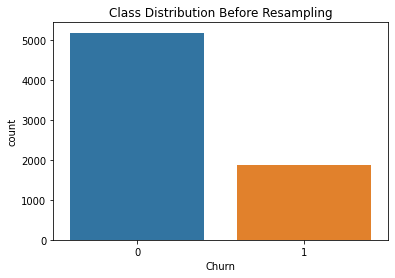

In [ ]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [ ]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

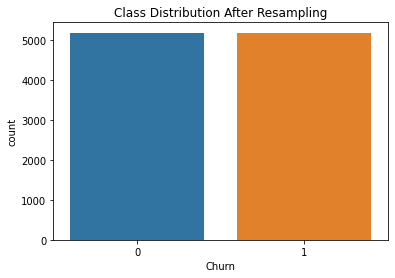

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

Handing variables with outliers..

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


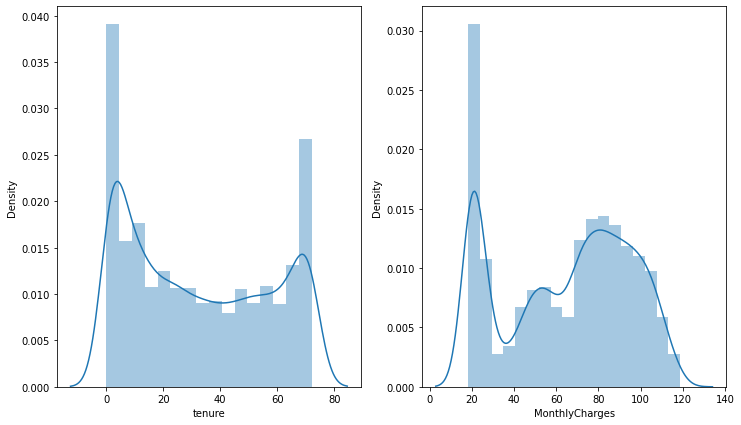

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [ ]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [ ]:
X.shape
(7043, 26)

(7043, 26)

Split the data into train and test 

In [ ]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1)
y = X_upsampled['Churn'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Comparison between different ML Models

In [ ]:
def fit_and_predict_model(model):
    ml = model
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, pred)
    pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test, pred_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_test)
    #print('Accuracy on training set :', acc_train)
    print('Accuracy :', acc_test)
    print('Precision :', precision_score(y_test,pred_test))
    print('Recall :', recall_score(y_test, pred_test))
    #print('Confusion Matrix :', conf_matrix)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


For Ridge Classifier

Accuracy : 0.7618357487922706
Precision : 0.7488328664799253
Recall : 0.7816764132553606


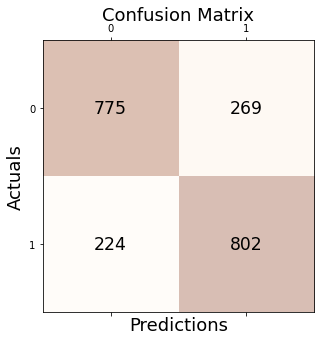

In [ ]:
fit_and_predict_model(RidgeClassifier())

For Random Forest Classifier

Accuracy : 0.8429951690821256
Precision : 0.8034632034632034
Recall : 0.9044834307992202


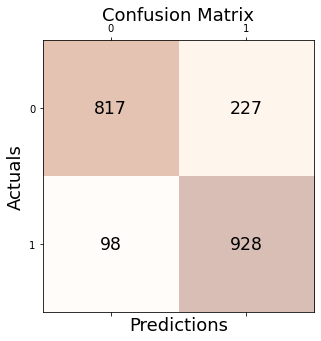

In [ ]:
fit_and_predict_model(RandomForestClassifier(n_estimators=100, max_depth=10))

For KNeighbor Classifier

Accuracy : 0.7913043478260869
Precision : 0.7491610738255033
Recall : 0.8703703703703703


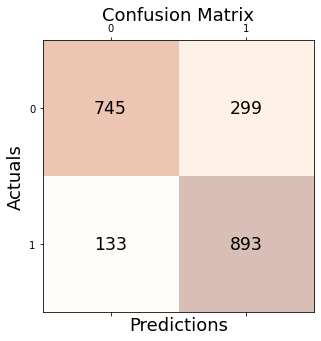

In [ ]:
fit_and_predict_model(KNeighborsClassifier())

For Logistic Regression

Accuracy : 0.7579710144927536
Precision : 0.7502383222116301
Recall : 0.767056530214425


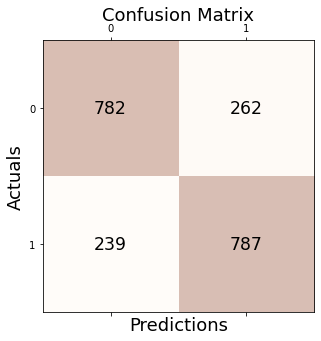

In [ ]:
fit_and_predict_model(LogisticRegression (max_iter=1000))

Accuracy : 0.9202898550724637
Precision : 0.8867924528301887
Recall : 0.9619883040935673


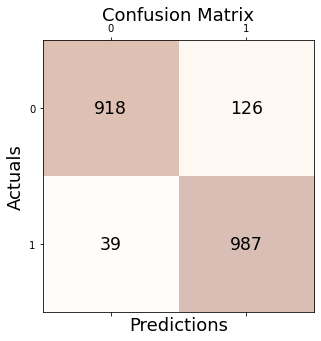

In [ ]:
param_grid_rf = {'n_estimators': np.arange (10, 2000, 10),
'max_features': ['auto', 'sqrt'],
'max_depth': np.arange(10, 200, 10),
'criterion': ['gini', 'entropy'],
'bootstrap': [True, False]}
rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
fit_and_predict_model(rf_random_grid)


In [ ]:
rf_random_grid.best_params_

{'n_estimators': 300,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
rf_random_grid.fit(X,y)
rf_random_grid.best_score_

Accuracy : 0.9077294685990338
Precision : 0.8652668416447944
Recall : 0.9639376218323586


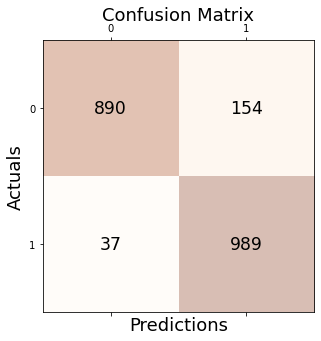

{'max_depth': 25, 'n_estimators': 300}

In [ ]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
fit_and_predict_model(clf)
clf.best_params_

In [ ]:
clf.fit(X, y)
clf.best_score_

0.9021067378345627